In [1]:
import tensorflow as tf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras

In [3]:
import glob

In [4]:
train_files=glob.glob("D:/fingers/train/*")

In [5]:
len(train_files)

18000

In [6]:
train_files

['D:/fingers/train\\00048bba-979b-4f84-b833-5bbbb082b582_0L.png',
 'D:/fingers/train\\000547a2-d456-4b16-b351-12ca9b40e390_0L.png',
 'D:/fingers/train\\000cac8e-fcf0-4f8c-bd16-c257d1e6d7a8_2L.png',
 'D:/fingers/train\\000d9961-8136-4dee-9820-86e178777958_0L.png',
 'D:/fingers/train\\0010095b-2e3d-4517-a511-1f688c378f96_5L.png',
 'D:/fingers/train\\00147c9a-67f5-4e86-a56b-681f0815ef2b_5R.png',
 'D:/fingers/train\\0014eacf-b0b7-49af-9d67-83661b3debb4_2R.png',
 'D:/fingers/train\\001cddc6-e29c-44da-82d5-bd00ec215f07_2R.png',
 'D:/fingers/train\\001e18d6-4632-4876-a922-7b4ead742070_3L.png',
 'D:/fingers/train\\00218888-86f2-4154-87f1-003dee60af03_0R.png',
 'D:/fingers/train\\0021e94b-7913-47f4-8ec6-0d11b1a30bb1_4L.png',
 'D:/fingers/train\\002266f8-db3f-4be8-a45a-3f6f9958d1f8_2L.png',
 'D:/fingers/train\\00230b23-340e-4e24-89f6-ebd0a55a6dad_0L.png',
 'D:/fingers/train\\002a1af0-8700-47df-b4e0-ef18ffde24de_1L.png',
 'D:/fingers/train\\002bed28-19ae-4b57-981e-2d047d83d4f6_2R.png',
 'D:/finge

In [7]:
from random import shuffle
shuffle(train_files)
train_files

['D:/fingers/train\\6c7088a0-e75e-4624-8d1a-b9f8b5f3e594_4L.png',
 'D:/fingers/train\\7cf302f0-bfa6-4a60-a1e3-b2bb39e38c2d_3R.png',
 'D:/fingers/train\\17d9b767-c775-4663-b279-79ac6b4d37f2_5L.png',
 'D:/fingers/train\\9c3b3f73-d229-4049-b7c7-6ae83d16f3c3_3R.png',
 'D:/fingers/train\\0dbddcfb-fe03-4291-bd58-27f22900af01_1L.png',
 'D:/fingers/train\\cb679267-b414-492c-96c1-c76969c706b1_0L.png',
 'D:/fingers/train\\e74169ca-5fa3-419e-9a0f-6d9d20bd7505_5R.png',
 'D:/fingers/train\\01e90f0d-d976-4413-ab22-a79d25b3a7ae_3L.png',
 'D:/fingers/train\\35e563de-a1bd-41c1-9c80-b6b82b028041_5R.png',
 'D:/fingers/train\\f858d593-2598-4aa8-b169-eea0ccb5b037_5L.png',
 'D:/fingers/train\\21cc61a4-3ceb-4db5-a9c9-bebf935780d3_4R.png',
 'D:/fingers/train\\cdb35887-2cbb-4156-b7b2-b43327a2f5bb_5R.png',
 'D:/fingers/train\\6b1ef394-ae70-4d7b-bb1d-ef68d7aa8a7a_3L.png',
 'D:/fingers/train\\e28d64c8-ab54-4647-b0cc-b56589bc9ca2_1L.png',
 'D:/fingers/train\\a1c177e3-79cf-4069-bb5f-20dab6344d33_4R.png',
 'D:/finge

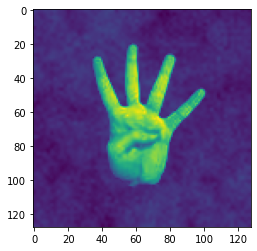

In [8]:
from PIL import Image
img=Image.open(train_files[0])
plt.imshow(img)

In [9]:
np.array(img).shape

(128, 128)

In [10]:
train_files[0][-5]

'L'

In [12]:
X_train=np.zeros((len(train_files),128,128))
Y_train=np.zeros((len(train_files),1))
for i, fi in enumerate(train_files):
    im=Image.open(fi)
    X_train[i,:,:]=np.array(im)
    Y_train[i]=   fi[-6]
    

In [13]:
X_train[0]

array([[67., 65., 62., ..., 44., 39., 37.],
       [65., 63., 60., ..., 45., 41., 40.],
       [60., 59., 56., ..., 46., 46., 45.],
       ...,
       [49., 50., 50., ..., 53., 56., 57.],
       [55., 55., 56., ..., 56., 54., 52.],
       [58., 58., 58., ..., 58., 52., 50.]])

In [14]:
X_train/255.0 #because range of a pixel number is from 1 to 255

array([[[0.2627451 , 0.25490196, 0.24313725, ..., 0.17254902,
         0.15294118, 0.14509804],
        [0.25490196, 0.24705882, 0.23529412, ..., 0.17647059,
         0.16078431, 0.15686275],
        [0.23529412, 0.23137255, 0.21960784, ..., 0.18039216,
         0.18039216, 0.17647059],
        ...,
        [0.19215686, 0.19607843, 0.19607843, ..., 0.20784314,
         0.21960784, 0.22352941],
        [0.21568627, 0.21568627, 0.21960784, ..., 0.21960784,
         0.21176471, 0.20392157],
        [0.22745098, 0.22745098, 0.22745098, ..., 0.22745098,
         0.20392157, 0.19607843]],

       [[0.18039216, 0.17254902, 0.15686275, ..., 0.19215686,
         0.18431373, 0.18431373],
        [0.17647059, 0.17254902, 0.16078431, ..., 0.19215686,
         0.18823529, 0.18431373],
        [0.17254902, 0.16862745, 0.16862745, ..., 0.19215686,
         0.19215686, 0.19215686],
        ...,
        [0.16862745, 0.17254902, 0.18039216, ..., 0.17647059,
         0.18039216, 0.18431373],
        [0.1

In [15]:
model= keras.Sequential([
    keras.layers.Conv2D(
    filters=120, # these numbers like 120 or 3 are known as hyper parameters which are important
    kernel_size=3,
    activation='relu',
    input_shape=(128,128,1)
    ),
    keras.layers.Conv2D(
    filters=24,
    kernel_size=3,
    activation='relu',
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=96,
        activation='relu',
    ),
    keras.layers.Dense(6,activation='softmax')
    
]) #model structure has 5 hyper parameters
#Conv2D , Dense , flatten , maxpool //tuesday  ,activation, filter //thrusday next assigment tuesday, saturday 

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 120)     1200      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 24)      25944     
                                                                 
 flatten (Flatten)           (None, 369024)            0         
                                                                 
 dense (Dense)               (None, 96)                35426400  
                                                                 
 dense_1 (Dense)             (None, 6)                 582       
                                                                 
Total params: 35,454,126
Trainable params: 35,454,126
Non-trainable params: 0
_________________________________________________________________


In [22]:
X_train=X_train.reshape(len(X_train),128,128,1)

In [23]:
X_train.shape

(18000, 128, 128, 1)

In [ ]:
model.fit(X_train, Y_train,epochs=2,validation_split=0.1)

Epoch 1/2
270/507 [==============>...............] - ETA: 11:44 - loss: 0.4842 - accuracy: 0.8167

In [ ]:
Assignment 3 : min 60 ac
    4 days
    friday submission
    no additional time
    
    

In [ ]:
1. transfer learning
